# **Quality control of raw data**

We will use the `FastQC` program to assess the quality of the raw sequencing data.

### **1.) Run `FastQC` on a pair of files `Sample_1.R1.fastq.gz` and `Sample_1.R2.fastq.gz`**

> Note that the folder for output results must exist, i.e. it should be created before running the program.
<br>
> What problems are observed? How can they be fixed?

In [2]:
! fastqc data/Sample_1.R1.fastq.gz data/Sample_1.R2.fastq.gz -o fastqc_results

application/gzip
Started analysis of Sample_1.R1.fastq.gz
application/gzip
Analysis complete for Sample_1.R1.fastq.gz
Started analysis of Sample_1.R2.fastq.gz
Analysis complete for Sample_1.R2.fastq.gz


#### **Per base sequence quality**

|Forward read|Reverse read|
|-|-|
|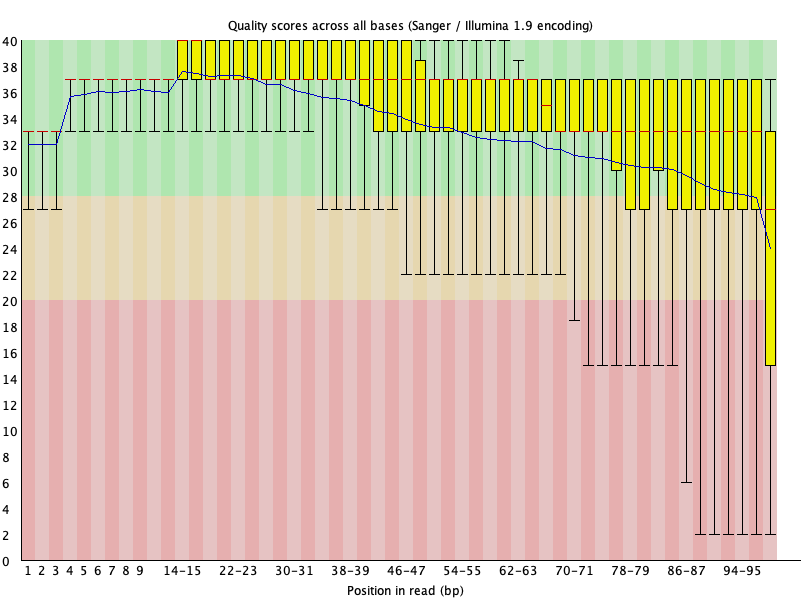|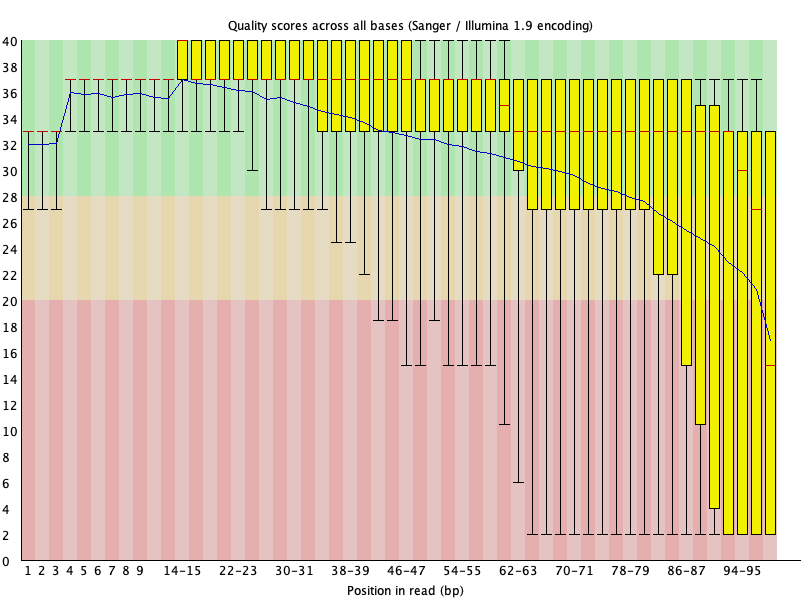|

We have boxplot graphs that show the quality by read length. We can see that for file `R2` the quality is expectedly worse than for `R1`. Reverse reads are worse a little bit, this is normal because reverse reads are timed to read later than forward reads, but similarly we can see that towards the end of the read the quality drops, which is expected.

#### **Per tile sequence quality**

|Forward read|Reverse read|
|-|-|
|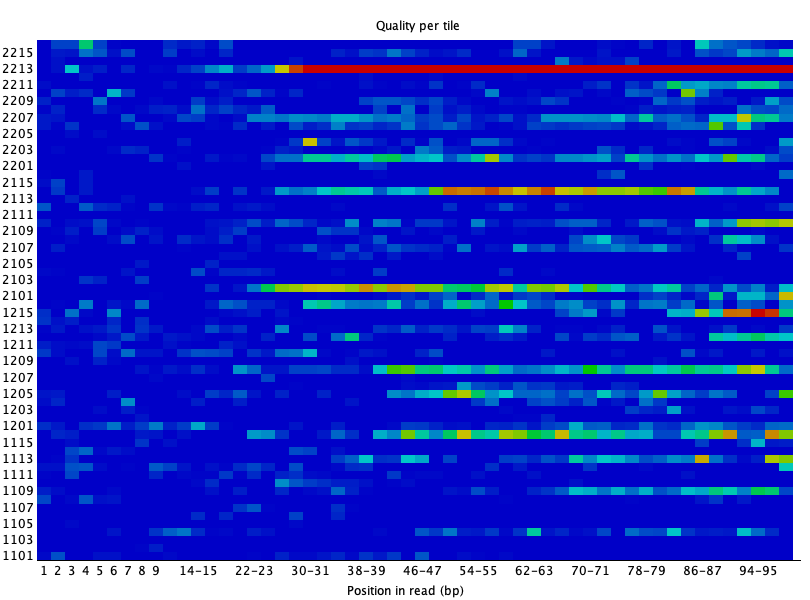|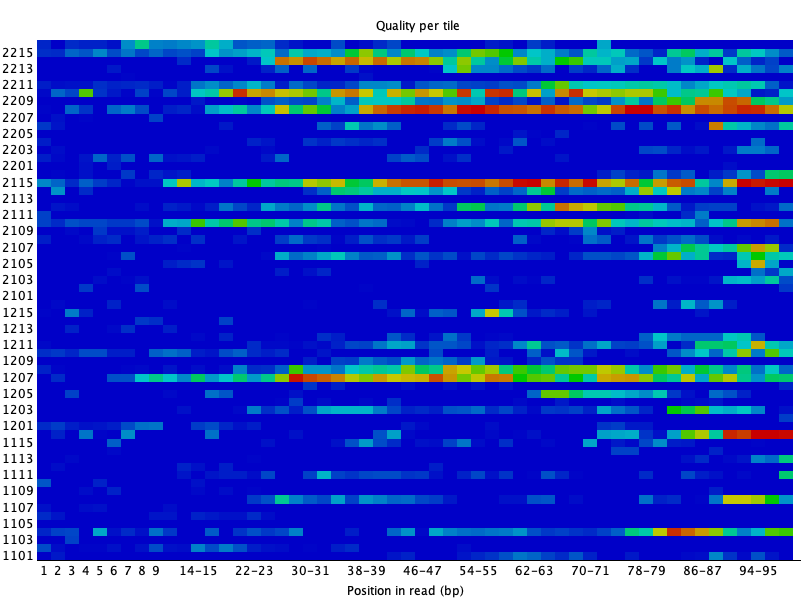|

These graphs show the quality per individual "tile". There is a slight inequality here, but in fact we have too few readings to notice any trends here. The main thing is that if there are any clear situations in this graph, where there is a group of "tiles" that are doing badly and they are next to each other, this is a reason to suspect that we have a problem with the flow cell (it is dirty).

#### **Per sequence quality scores**

|Forward read|Reverse read|
|-|-|
|![Per sequence quality scores R1.png](<attachment:Per sequence quality scores R1.png>)|![Per sequence quality scores R2.png](<attachment:Per sequence quality scores R2.png>)|
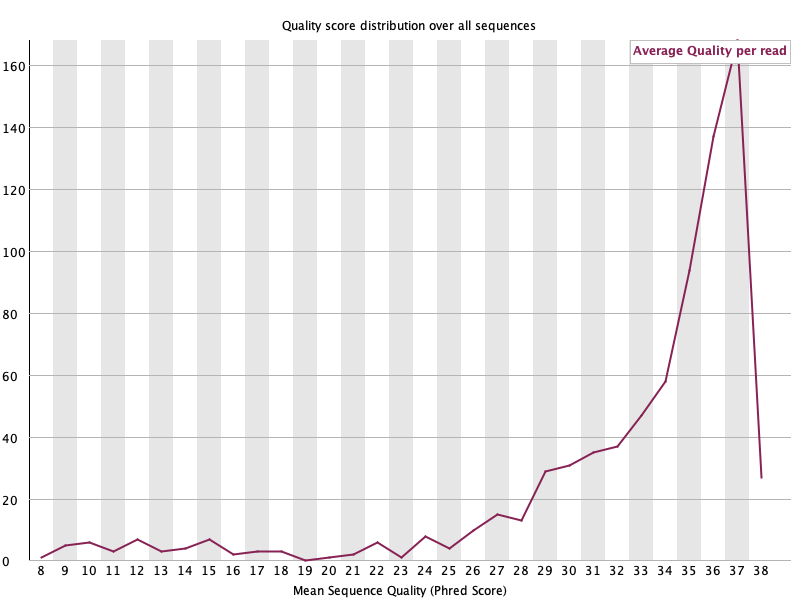
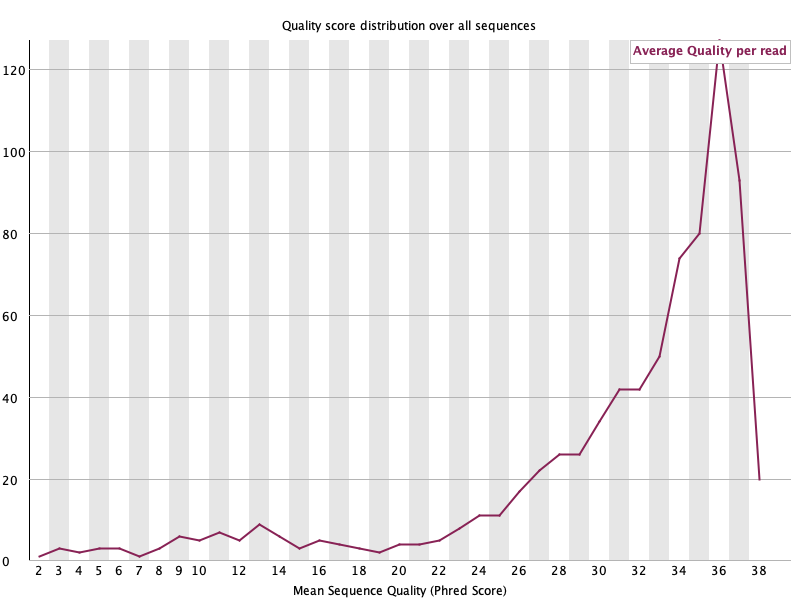

Quality averaged per read. Distribution: more than 100 reads with normal quality, but there is also a rather large tail with reads that average poor quality.

#### **Per base sequence content**

|Forward read|Reverse read|
|-|-|
|![Per base sequence content R1.png](<attachment:Per base sequence content R1.png>)|![Per base sequence content R2.png](<attachment:Per base sequence content R2.png>)|
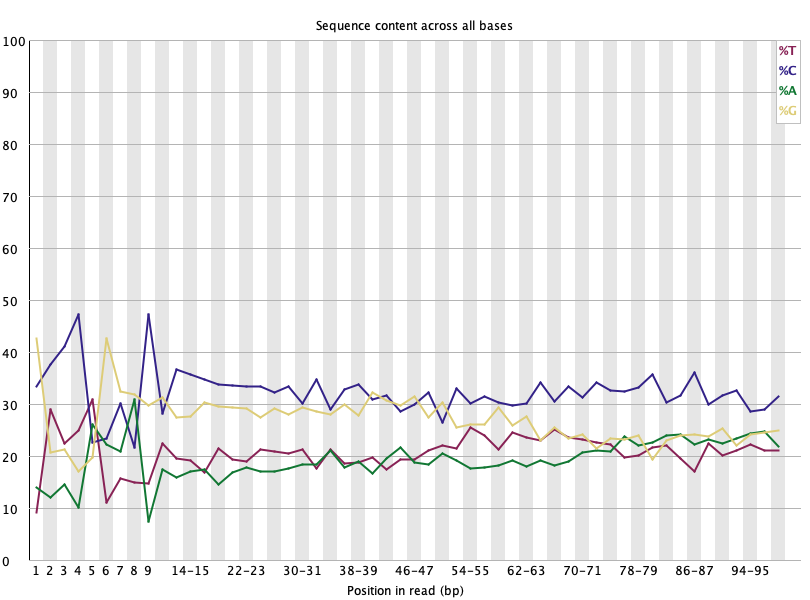
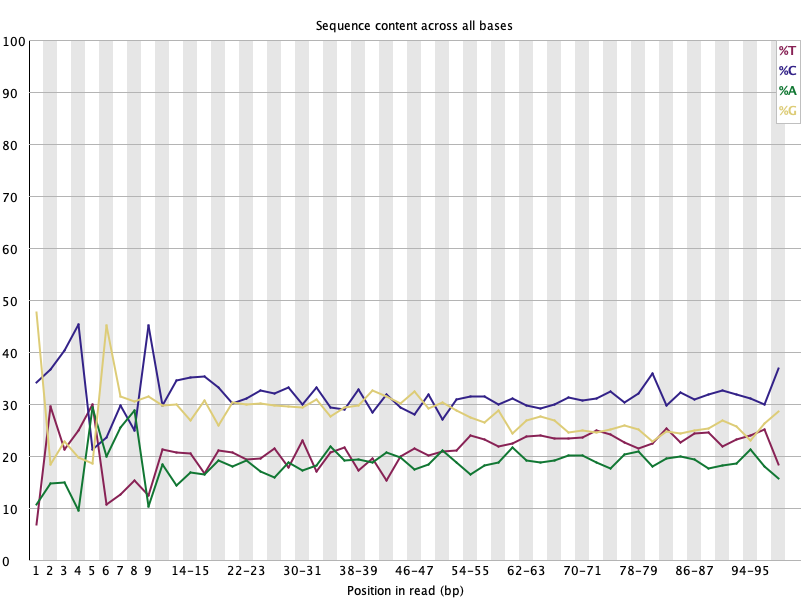

Distribution of nucleotide composition by position in the read. It can be seen that there are no sharp peaks here, although the graph looks rather broken. This is also because we have few reads. If we had more reads, the graph would probably be more or less even. The main thing is that there are no sharp big peaks.

#### **Per sequence GC content**

|Forward read|Reverse read|
|-|-|
|![Per sequence GC content R1.png](<attachment:Per sequence GC content R1.png>)|![Per sequence GC content R2.png](<attachment:Per sequence GC content R2.png>)|
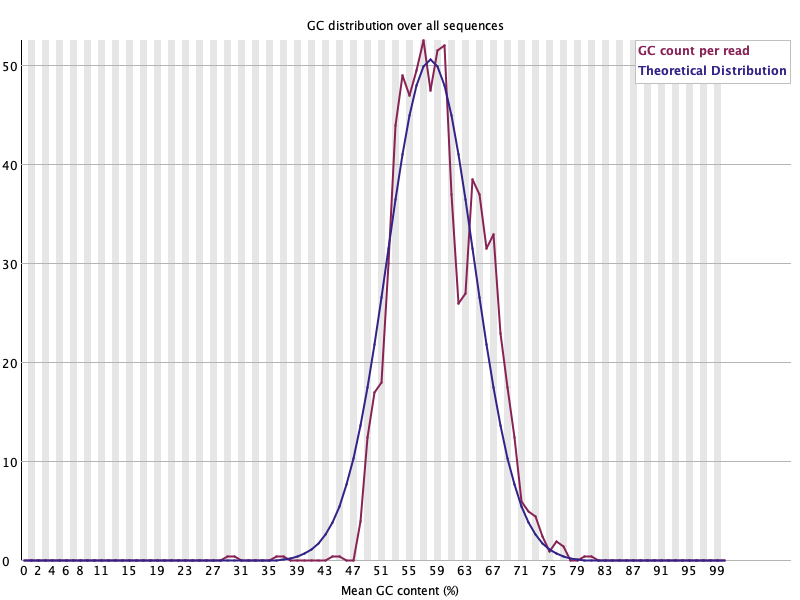
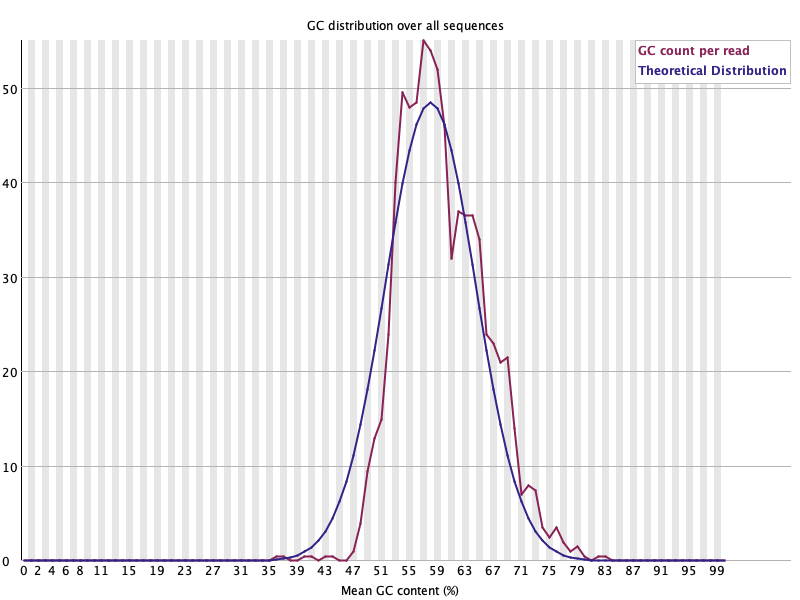

GC composition distribution. It is used to analyse contamination. If we had 2 peaks on the graph, we could say that we probably have contaminants because we have organisms with different GC compositions present. It may appear that there is also a second peak in our data, but we have little data and the "little extra hump" merges with the main hump, meaning it is not a full-fledged second peak.

#### **Adapter Content**

|Forward read|Reverse read|
|-|-|
|![Adapter Content R1.png](<attachment:Adapter Content R1.png>)|![Adapter Content R2.png](<attachment:Adapter Content R2.png>)|
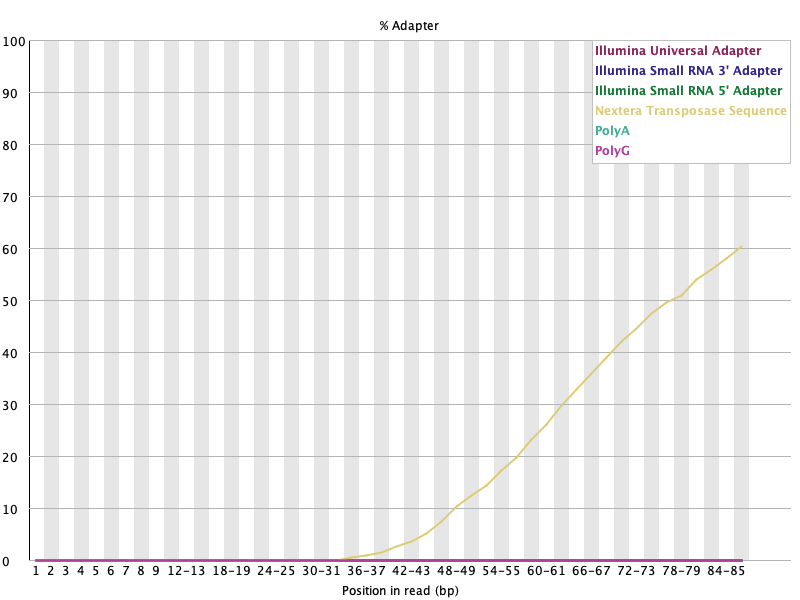
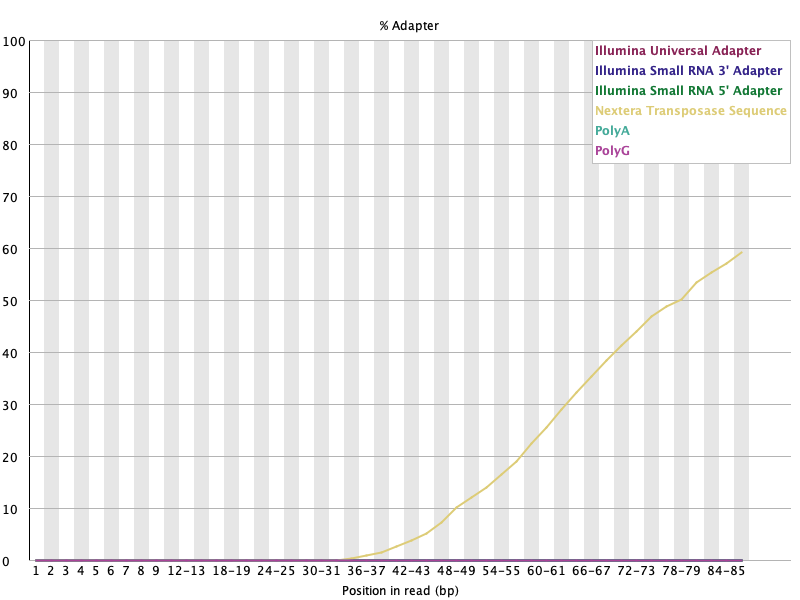

This is the biggest problem in our data. We see that we have a fairly early increase in the percentages of adapter content in the reads. In the most recent nucleotide reads, over 60% of the reads contain adapters. This tells us that the library was short, so the adapters got in. This means that we have a very short piece of DNA, and when we read it, we have read it all, and then we go on to read the adapters.

### **2.) Cleaning reads from adapters and low quality sequences with `Trimmomatic`**

>What do the options mean?<br>
>How many readings remain after `Trimmomatic` data processing?

In [12]:
! trimmomatic PE -phred33 data/Sample_1.R1.fastq.gz data/Sample_1.R2.fastq.gz \
    trimmomatic_result/Sample_1.R1.paired.fastq.gz \
        trimmomatic_result/Sample_1.R1.unpaired.fastq.gz \
            trimmomatic_result/Sample_1.R2.paired.fastq.gz \
                trimmomatic_result/Sample_1.R2.unpaired.fastq.gz \
                    ILLUMINACLIP:'adapters/NexteraPE-PE.fa':2:30:10 \
                        LEADING:10 TRAILING:10 SLIDINGWINDOW:4:10 MINLEN:50

TrimmomaticPE: Started with arguments:
 -phred33 data/Sample_1.R1.fastq.gz data/Sample_1.R2.fastq.gz trimmomatic_result/Sample_1.R1.paired.fastq.gz trimmomatic_result/Sample_1.R1.unpaired.fastq.gz trimmomatic_result/Sample_1.R2.paired.fastq.gz trimmomatic_result/Sample_1.R2.unpaired.fastq.gz ILLUMINACLIP:adapters/NexteraPE-PE.fa:2:30:10 LEADING:10 TRAILING:10 SLIDINGWINDOW:4:10 MINLEN:50
Multiple cores found: Using 4 threads
Using PrefixPair: 'AGATGTGTATAAGAGACAG' and 'AGATGTGTATAAGAGACAG'
Using Long Clipping Sequence: 'GTCTCGTGGGCTCGGAGATGTGTATAAGAGACAG'
Using Long Clipping Sequence: 'TCGTCGGCAGCGTCAGATGTGTATAAGAGACAG'
Using Long Clipping Sequence: 'CTGTCTCTTATACACATCTCCGAGCCCACGAGAC'
Using Long Clipping Sequence: 'CTGTCTCTTATACACATCTGACGCTGCCGACGA'
ILLUMINACLIP: Using 1 prefix pairs, 4 forward/reverse sequences, 0 forward only sequences, 0 reverse only sequences
Input Read Pairs: 767 Both Surviving: 213 (27.77%) Forward Only Surviving: 428 (55.80%) Reverse Only Surviving: 10 (1.30%) 

Let's break down the options:

- `trimmomatic`: Invokes the Trimmomatic tool.
- `PE`: Indicates that the input data consists of paired-end reads.
- `-phred33`: Specifies that the quality scores are in Phred+33 encoding. Phred+33 is a common format for quality scores in Illumina sequencing data.
- `data/Sample_1.R1.fastq.gz` and `data/Sample_1.R2.fastq.gz`: Input files containing the paired-end reads for Sample_1. `.fastq.gz` indicates that the files are in FASTQ format and compressed with gzip.
- `trimmomatic_result/Sample_1.R1.paired.fastq.gz` and `trimmomatic_result/Sample_1.R1.unpaired.fastq.gz`: Output files containing the paired and unpaired reads for Sample_1 from read 1.
- `trimmomatic_result/Sample_1.R2.paired.fastq.gz` and `trimmomatic_result/Sample_1.R2.unpaired.fastq.gz`: Output files containing the paired and unpaired reads for Sample_1 from read 2.
- `ILLUMINACLIP:'adapters/NexteraPE-PE.fa':2:30:10`: Adapter clipping. This option specifies the adapter sequences file (`NexteraPE-PE.fa`), followed by seed mismatches (2), palindrome clip threshold (30), and simple clip threshold (10). It trims adapters and other illumina-specific sequences from the reads.
- `LEADING:10`: Removes low-quality bases from the start of the reads if they have a quality score lower than 10.
- `TRAILING:10`: Removes low-quality bases from the end of the reads if they have a quality score lower than 10.
- `SLIDINGWINDOW:4:10`: Performs a sliding window trimming. It scans the read with a 4-base wide window, cutting when the average quality per base drops below 10.
- `MINLEN:50`: Discards reads that are shorter than 50 bases after trimming.

In summary, this command takes paired-end FASTQ files as input, trims adapters, removes low-quality bases, and performs quality-based trimming to improve the overall quality of the reads. It then separates the trimmed reads into paired and unpaired files for both reads 1 and 2.

Input Read Pairs: 767
- Both Surviving: 213 (27.77%)
- Forward Only Surviving: 428 (55.80%)
- Reverse Only Surviving: 10 (1.30%)
- Dropped: 116 (15.12%)

#### **Adapter trimming**
- Cleaning data from adapters and low quality bases at the ends can improve the results of some programmes
- It is critical to clean raw data before genome assembly
- There are a number of tools for removing adapters:
    - `Trimmomatic`
    - `fastp`
    - `BBduk`
    - `cutadapt`
    - ...

**NB!**<br>
When searching for genetic variants using modern tools, removing adapters may not only not improve but even worsen the results of the analysis!

![Adapters trimming.png](<attachment:Adapters trimming.png>)
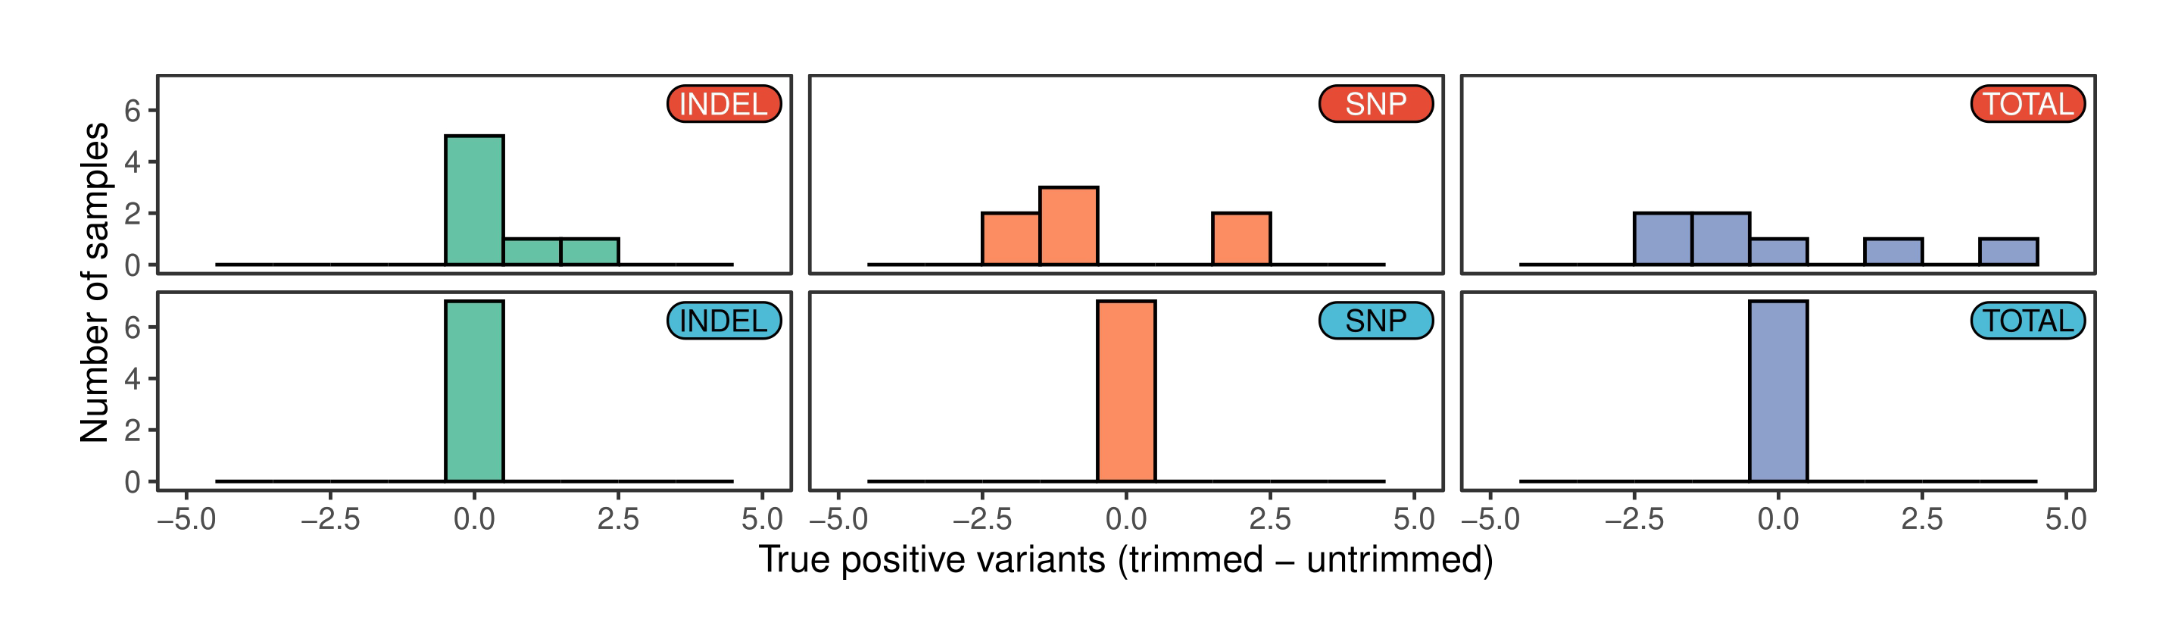

### **3.) Evaluate the data quality after trimming using `FastQC`**

> Did the data quality get better after trimming?

In [13]:
! fastqc trimmomatic_result/Sample_1.*paired.fastq.gz -o fastqc_results

application/gzip
application/gzip
application/gzip
application/gzip
Started analysis of Sample_1.R1.paired.fastq.gz
Analysis complete for Sample_1.R1.paired.fastq.gz
Started analysis of Sample_1.R1.unpaired.fastq.gz
Analysis complete for Sample_1.R1.unpaired.fastq.gz
Started analysis of Sample_1.R2.paired.fastq.gz
Analysis complete for Sample_1.R2.paired.fastq.gz
Started analysis of Sample_1.R2.unpaired.fastq.gz
Analysis complete for Sample_1.R2.unpaired.fastq.gz


#### **Per base sequence quality**

|Forward paired read|Forward unpaired read|Reverse paired read|Reverse unpaired read|
|-|-|-|-|
|![Per base sequence quality P R1.png](<attachment:Per base sequence quality P R1.png>)|![Per base sequence quality UnP R1.png](<attachment:Per base sequence quality UnP R1.png>)|![Per base sequence quality P R2.png](<attachment:Per base sequence quality P R2.png>)|![Per base sequence quality UnP R2.png](<attachment:Per base sequence quality UnP R2.png>)|
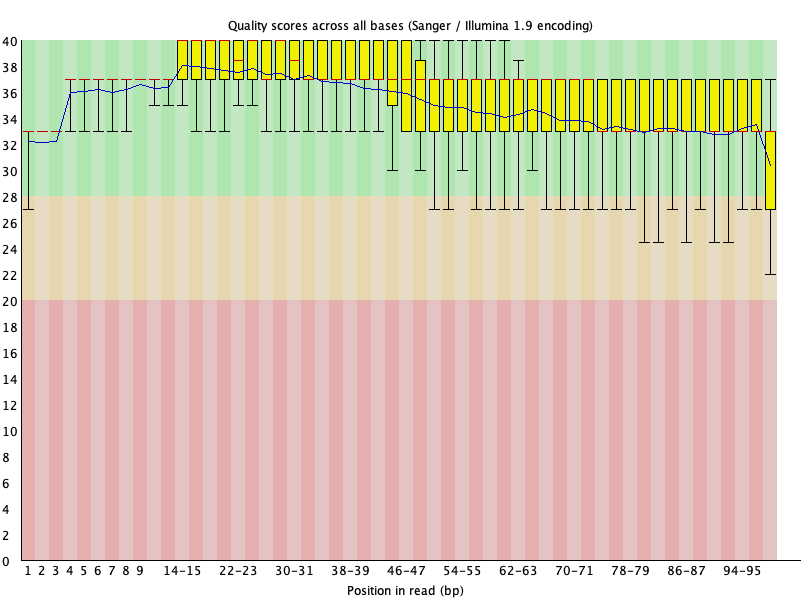
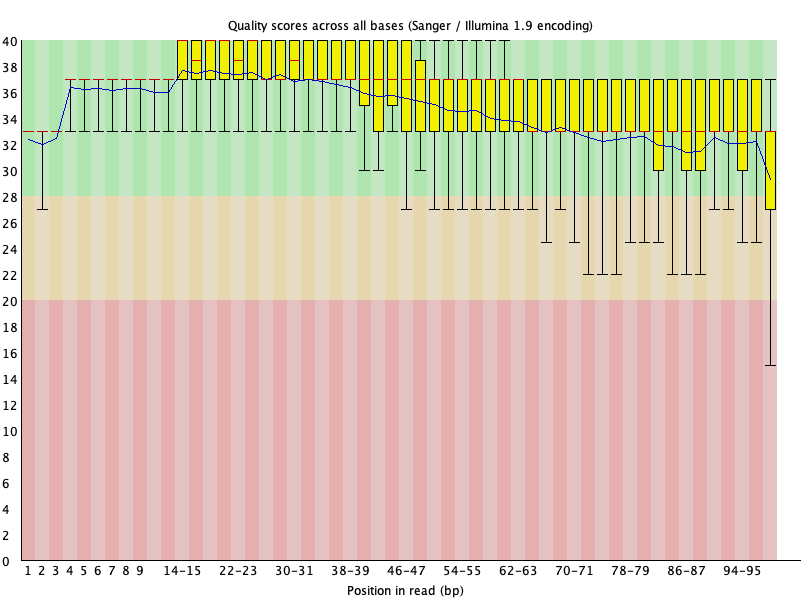
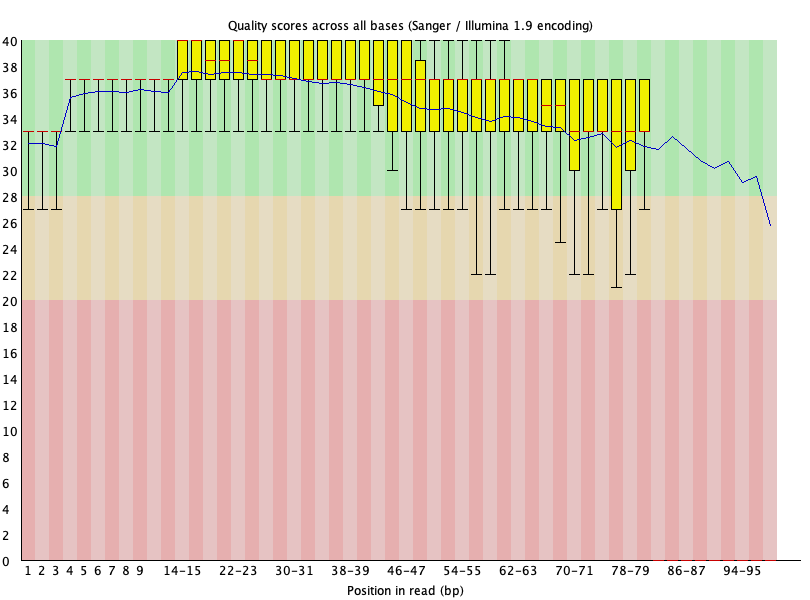
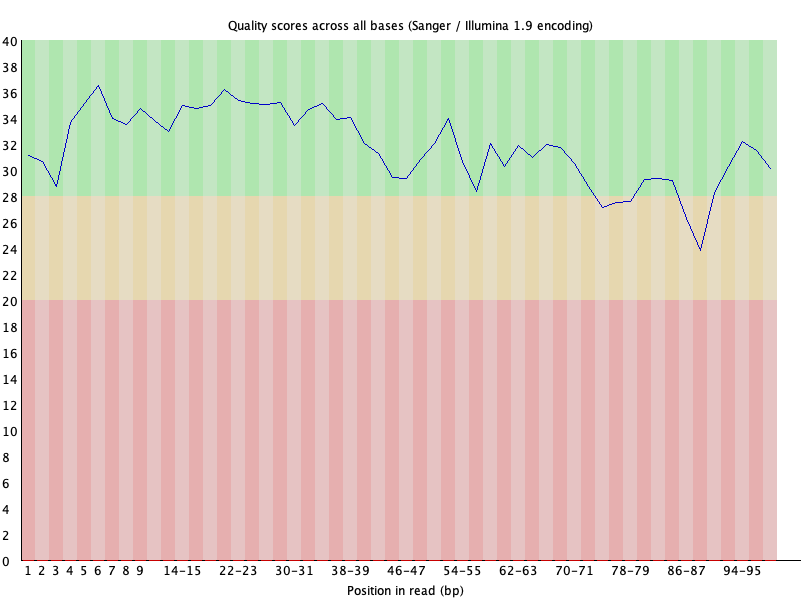

Paired readings are those that have a pair preserved. There are far fewer of them.

#### **Adapter Content**

|Forward paired read|Forward unpaired read|Reverse paired read|Reverse unpaired read|
|-|-|-|-|
|![Adapter Content P R1.png](<attachment:Adapter Content P R1.png>)|![Adapter Content UnP R1.png](<attachment:Adapter Content UnP R1.png>)|![Adapter Content P R2.png](<attachment:Adapter Content P R2.png>)|![Adapter Content UnP R2.png](<attachment:Adapter Content UnP R2.png>)|
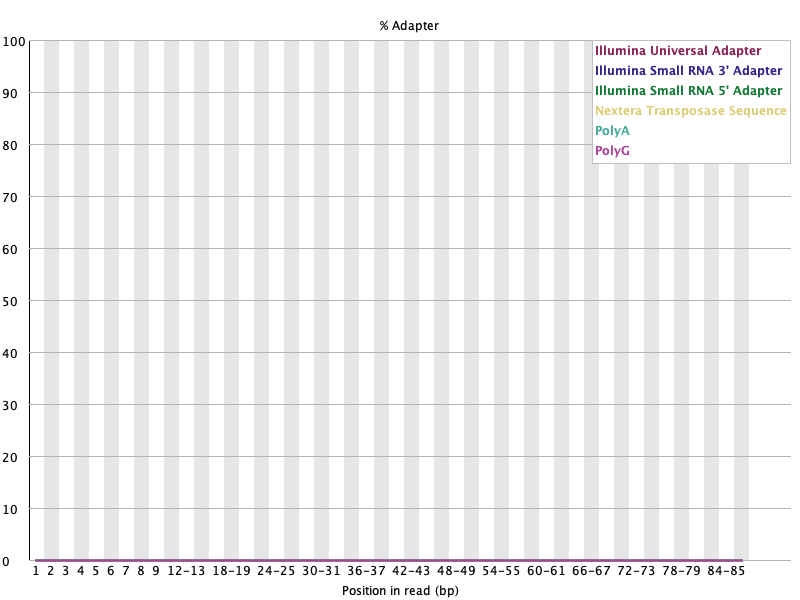
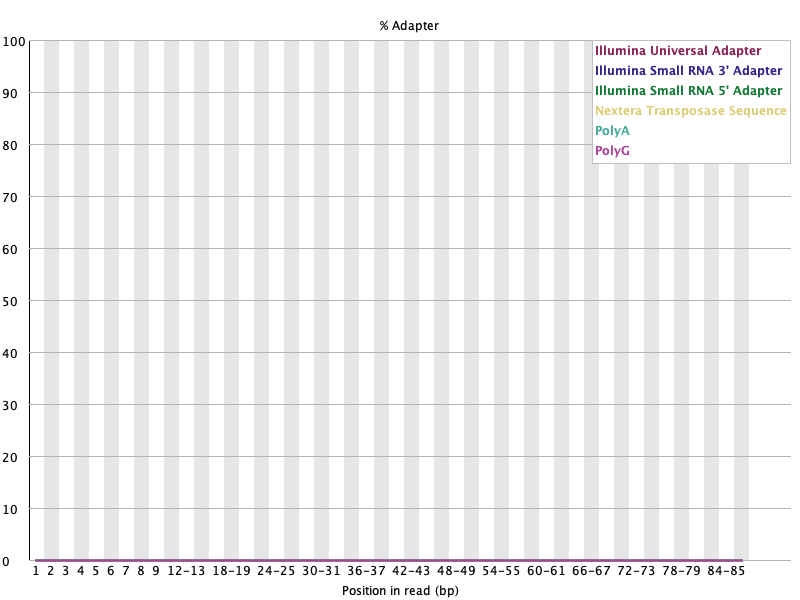
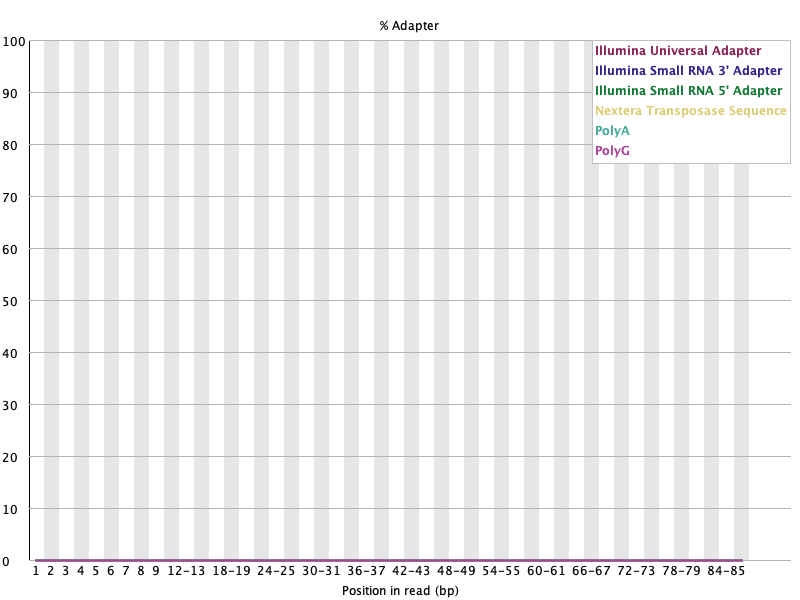
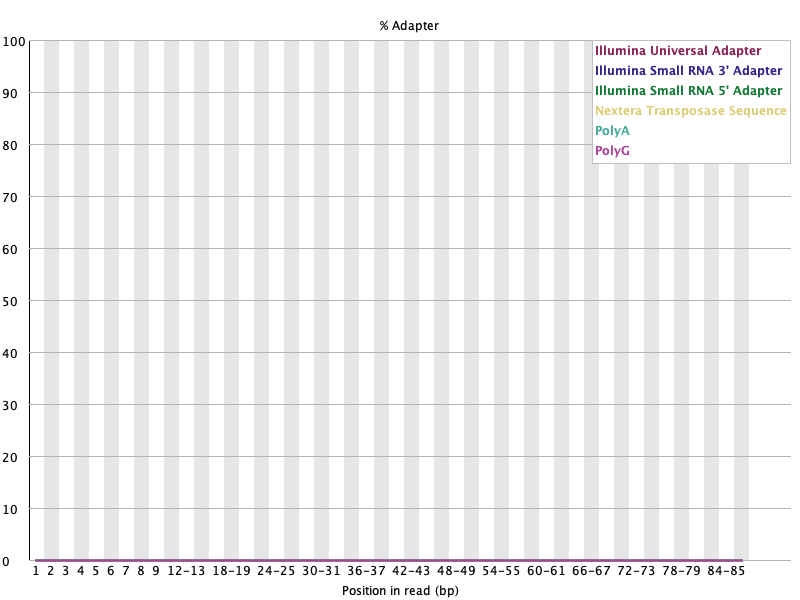

But if we look at the adapter content chart, we see that adapters have been trimmed, there are hardly any left.